In [38]:
import pandas as pd
import pickle


import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Load from Flaml
ml_name = 'All-Logs'


tq = 'dct'
dval = 0.5
ds_name = 'BenzeneConcentration'

model_path = f'/home/sim/Desktop/TS Extrinsic Regression/All-Logs/{ds_name}_Runs/{dval}_{tq}_{ds_name}_20min_Flaml_f/flaml_model.pkl'


# Both contain the target value in column target!
train_path = f'/home/sim/Desktop/TS Extrinsic Regression/features_dfs/{ds_name}/{dval}_{tq}_{ds_name}_features_TRAIN'
test_path = f'/home/sim/Desktop/TS Extrinsic Regression/features_dfs/{ds_name}/{dval}_{tq}_{ds_name}_features_TEST'
train_features = pd.read_parquet(train_path)
test_features = pd.read_parquet(test_path)



# Load the FLAML model
with open(model_path, 'rb') as f:
    automl = pickle.load(f)


X_train = train_features.drop('target', axis=1)
X_train
feature_names = X_train.columns.tolist()



In [44]:
# Keep in mind to cut the

path_to_selectedf =  f'/home/sim/Desktop/TS Extrinsic Regression/All-Logs/{ds_name}_Runs/{dval}_{tq}_{ds_name}_20min_Flaml_f/selected_features.txt'

lines = []
with open(path_to_selectedf, 'r') as file:
    lines = file.read().splitlines()  # Read and store lines in a list



In [47]:
print(test_features[lines].shape)

(5163, 2513)


In [48]:
# -> around 30 secs for flood and basic values
from sklearn.inspection import permutation_importance

# SK-Learn permutation shuffling
p_imp = permutation_importance(automl.model.estimator, X = test_features[lines], y = test_features['target'])

print(p_imp['importances_mean'].shape)
p_imp['importances_mean']

(2513,)


array([ 1.95269892e-01,  3.84144381e-02,  7.63377083e-02, ...,
        0.00000000e+00, -2.22202263e-06,  5.55221961e-05])

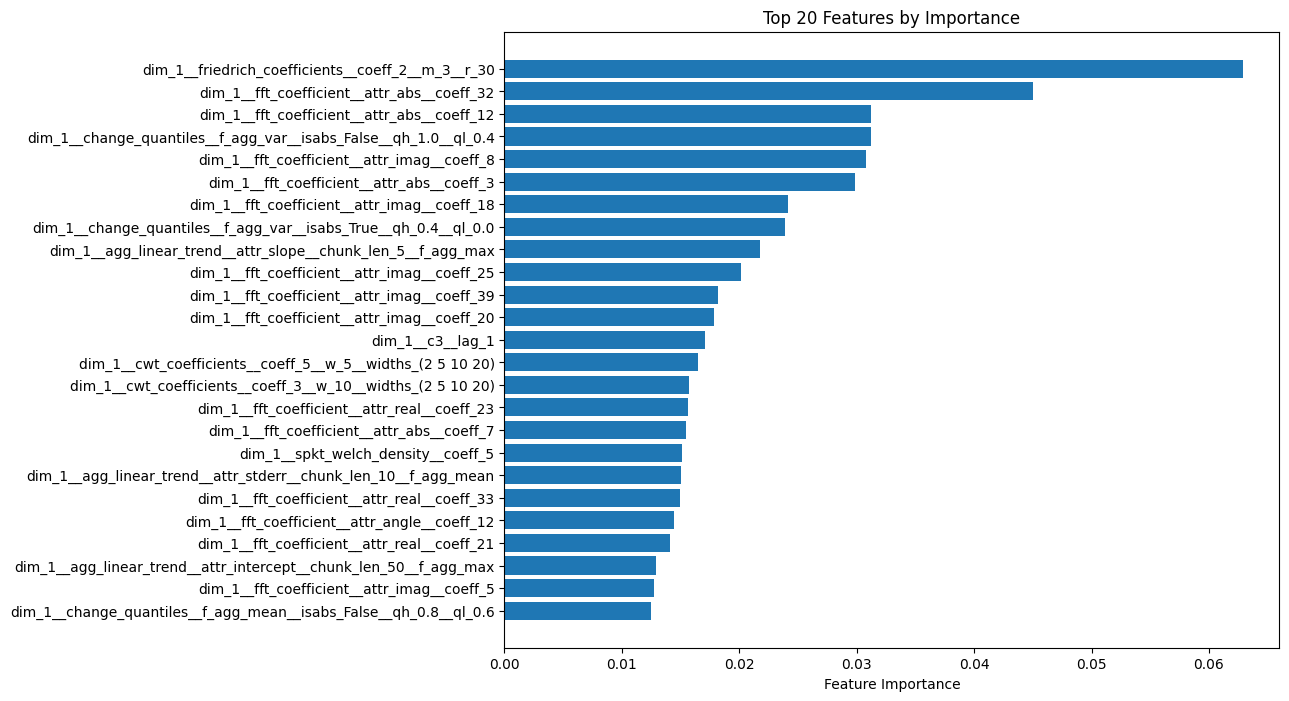

In [40]:
# Get the indices of the top 25 feature importances
top_indices = np.argsort(automl.feature_importances_)[-25:]

# Plot the top 20 features
plt.figure(figsize=(10, 8))
plt.barh(np.array(automl.feature_names_in_)[top_indices], automl.feature_importances_[top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features by Importance')
plt.show()